In [1]:
# Notebook to compute Target period of 40 or 3 vs. passive 40/3
import neuraltda.topology2 as tp2
import pandas as pd
from joblib import Parallel, delayed
import neuraltda.simpComp as sc
import neuraltda.topology2 as tp2
import neuraltda.spectralAnalysis as sa
import pickle
import glob
import os
from ephys import core, events, clust
import numpy as np
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Bin The Data

# Correct/Incorrect
winSizes = [5.0, 10.0, 25.0, 50.0]
segmentInfo = [0, 0] # Sample + Target/Distractor period
#segmentInfo = [2500, 0] # Target+Distractor period
povers = 0.5

blockPath='/home/brad/emily/P01S15/'

In [4]:
reload(sa)
winSize = 10.0 #ms
thresh = 13.0
povers = 0.5
cluster_group = ['Good', 'MUA']
widenarrow_threshold = 0.000230 # sw threshold in seconds
segmentInfo = [0, -2500] # Target Period
spikes = core.load_spikes(blockPath)
trials = events.load_trials(blockPath)
fs = core.load_fs(blockPath)

# Get wide/narrow clusters
clusters = core.load_clusters(blockPath)
clusters_list = clusters[clusters.quality.isin(cluster_group)]['cluster'].unique()
(wide, narrow) = clust.get_wide_narrow(blockPath, clusters_list, widenarrow_threshold)

# Bin and compute SCG
bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, trials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='Targ')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
print('BDF: {}'.format(bdf))
sa.computeChainGroups(blockPath, bdf, thresh, comment='Targ-wide', clusters=wide)

bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, trials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='Targ')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
print('BDF: {}'.format(bdf))
sa.computeChainGroups(blockPath, bdf, thresh, comment='Targ-narrow', clusters=narrow)


bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, trials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='Targ')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
print('BDF: {}'.format(bdf))
sa.computeChainGroups(blockPath, bdf, thresh, comment='Targ-wide-shuffle', clusters=wide, shuffle=True)

bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, trials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='Targ')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
print('BDF: {}'.format(bdf))
sa.computeChainGroups(blockPath, bdf, thresh, comment='Targ-narrow-shuffle', clusters=narrow, shuffle=True)


BDF: /home/brad/emily/P01S15/binned_data/win-10.0_dtovr-5.0_seg-0--2500-Targ/20170517T165848Z-10.0-5.0.binned
Computing Chain Groups...
[u'T-1S-1D3', u'T-1S-1D40', u'T3S3D-1', u'T3S3D40', u'T3S8D-1', u'T3S8D40', u'T40S40D-1', u'T40S40D3', u'T40S70D-1', u'T40S70D3']
Stim: T-1S-1D3, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Poptens Error
Stim: T-1S-1D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Poptens Error
Stim: T3S3D-1, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
SCGGenSave: 25
Stim: T3S3D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 399, 64)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
32
36
33
40
37
41
44
42
48
43
38
34
49
45
50
35
46
52
51
53
47
39
56
60
61
57
54
62
55
63
29
58
59
30
31
SCGGenSave: 64
Stim: T3S8D-1, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 399, 51)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
34
40
41
29
46
30
42
47
35
36
37
43
48
38
39
49
50
31
32
44
45
33
SCGGenSave: 51
Stim: T3S8D40, Clusters:[2, 6, 

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
SCGGenSave: 25
Stim: T3S3D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 64)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
50
33
51
34
52
35
53
36
54
37
55
38
56
39
40
57
41
58
42
59
43
60
61
44
62
63
45
46
47
48
49
SCGGenSave: 64
Stim: T3S8D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 51)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
SCGGenSave: 51
Stim: T3S8D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 67)
0
1
2
3
4
5
6
7


Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
SCGGenSave: 25
Stim: T3S3D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 399, 64)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
38
29
30
31
39
32
48
33
40
49
50
41
51
58
42
52
43
34
59
44
53
35
60
45
46
54
47
61
55
36
56
62
57
63
37
SCGGenSave: 64
Stim: T3S8D-1, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 399, 51)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
40
30
31
41
32
42
33
43
34
44
35
45
46
36
37
47
38
39
48
49
50
SCGGenSave: 51
Stim: T3S8D40, Clusters:[2, 6, 

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
SCGGenSave: 25
Stim: T3S3D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 64)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
44
33
45
34
46
35
47
36
48
37
49
60
50
38
51
61
39
62
52
40
63
41
53
42
54
43
55
56
57
58
59
SCGGenSave: 64
Stim: T3S8D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 51)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
SCGGenSave: 51
Stim: T3S8D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 67)
0
1
2
3
4
5
6
7


In [5]:
# Bin All The Data
reload(sa)
winSize = 10.0 #ms
thresh = 13.0
povers = 0.5
cluster_group = ['Good', 'MUA']
widenarrow_threshold = 0.000230 # sw threshold in seconds
segmentInfo = [0, 0] # Full Trial
spikes = core.load_spikes(blockPath)
trials = events.load_trials(blockPath)
fs = core.load_fs(blockPath)

# Get wide/narrow clusters
clusters = core.load_clusters(blockPath)
clusters_list = clusters[clusters.quality.isin(cluster_group)]['cluster'].unique()
(wide, narrow) = clust.get_wide_narrow(blockPath, clusters_list, widenarrow_threshold)

# Bin and compute SCG
bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, trials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='Full')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
print('BDF: {}'.format(bdf))
sa.computeChainGroups(blockPath, bdf, thresh, comment='Full-wide', clusters=wide)

bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, trials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='Full')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
print('BDF: {}'.format(bdf))
sa.computeChainGroups(blockPath, bdf, thresh, comment='Full-narrow', clusters=narrow)


bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, trials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='Full')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
print('BDF: {}'.format(bdf))
sa.computeChainGroups(blockPath, bdf, thresh, comment='Full-wide-shuffle', clusters=wide, shuffle=True)

bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, trials, clusters, fs, winSize,
                                    segmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='Targ')
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
print('BDF: {}'.format(bdf))
sa.computeChainGroups(blockPath, bdf, thresh, comment='Full-narrow-shuffle', clusters=narrow, shuffle=True)


Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


Data Not already binned
BDF: /home/brad/emily/P01S15/binned_data/win-10.0_dtovr-5.0_seg-0-0-Full/20170517T171629Z-10.0-5.0.binned
Computing Chain Groups...
[u'T-1S-1D3', u'T-1S-1D40', u'T3S3D-1', u'T3S3D40', u'T3S8D-1', u'T3S8D40', u'T40S40D-1', u'T40S40D3', u'T40S70D-1', u'T40S70D3']
Stim: T-1S-1D3, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 399, 15)
0
1
2
3
4
5
7
6
9
8
10
11
12
13
14
SCGGenSave: 15
Stim: T-1S-1D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 400, 10)
0
1
2
3
4
5
6
7
8
9
SCGGenSave: 10
Stim: T3S3D-1, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
SCGGenSave: 15
Stim: T-1S-1D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 10)
0
1
2
3
4
5
6
7
8
9
SCGGenSave: 10
Stim: T3S3D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 900, 25)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
SCGGenSave: 25
Stim: T3S3D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 899, 64)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
38
37
39
40
41
42
43
44
45
48
46
49
47
50
51
52
53
54
58
55
56
59
60
57
61
62
63
SCGGenSave: 64
Stim: T3S8D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75,

Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
SCGGenSave: 15
Stim: T-1S-1D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 400, 10)
0
1
2
3
4
5
6
7
8
9
SCGGenSave: 10
Stim: T3S3D-1, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 900, 25)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
SCGGenSave: 25
Stim: T3S3D40, Clusters:[2, 6, 9, 10, 11, 17, 18, 19, 21, 22, 27, 28, 32, 37, 41, 54, 57, 58, 59, 64, 66, 70, 72, 81, 83, 86, 87, 90, 91, 92, 97, 99, 101, 102, 108, 113, 115, 118, 119, 121, 131, 139, 140, 141, 145, 149, 150]
Selecting Clusters: poptens:(47, 899, 64)
0
1
2
3
4
5
6
7
8
9
10
11
12
13


Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


Data Not already binned
BDF: /home/brad/emily/P01S15/binned_data/win-10.0_dtovr-5.0_seg-0-0-Targ/20170517T171748Z-10.0-5.0.binned
Computing Chain Groups...
[u'T-1S-1D3', u'T-1S-1D40', u'T3S3D-1', u'T3S3D40', u'T3S8D-1', u'T3S8D40', u'T40S40D-1', u'T40S40D3', u'T40S70D-1', u'T40S70D3']
Stim: T-1S-1D3, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 399, 15)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
SCGGenSave: 15
Stim: T-1S-1D40, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 400, 10)
0
1
4
2
3
5
6
7
8
9
SCGGenSave: 10
Stim: T3S3D-1, Clusters:[5, 12, 14, 15, 16, 20, 24, 31, 33, 60, 61, 63, 65, 67, 69, 75, 84, 98, 104, 106, 107, 112, 120, 128, 132, 136, 148]
Selecting Clusters: poptens:(27, 900, 25)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
SCGGenSave: 

In [12]:
def JS_vs_beta_pairwise_attn(beta, scg_A, scg_B, d):
    '''
    Compute pairwise divergences between trials 
    for spike trains A and B represented as simplicial complexes
    '''
    divsave = []
    divincsave = []
    diffsave = []
    ntrials1 = len(scg_A)
    ntrials2 = len(scg_B)
    for ind in range(ntrials1):
        for ind2 in range(ntrials2):
            #print(stim1, t1, stim2, t2)
            scgAt = scg_A[ind] #SD
            scgBt = scg_B[ind2] #Targ
            div = sa.compute_JS_expanded(scgAt, scgBt, d, beta)
            divsave.append(float(div))
    m1 = np.mean(divsave)
    sd1 = np.std(divsave)

    return divsave


def JS_vs_beta_pairwise(beta, stim, scgSD, scgT, d):
    divsave = []
    divincsave = []
    diffsave = []
    ntrials = min([len(scgSD[stim]), len(scgT[stim])])
    for ind in range(ntrials):
            #print(stim1, t1, stim2, t2)
        scgA = scgSD[stim][ind] #SD
        scgB = scgT[stim][ind] #Targ
        div = sa.compute_JS_expanded(scgA, scgB, d, beta)
        divsave.append(float(div))
    m1 = np.mean(divsave)
    sd1 = np.std(divsave)

    return divsave

In [10]:
fnames = {}
fnameshuff = {}
periods = ['Full', 'Targ']
widths = ['wide', 'narrow']
for p in periods:
    fnames[p] = []
    fnameshuff[p] = []
    for w in widths:
        fnames[p].append(p + '-' + w + '.scg')
        fnameshuff[p].append(p + '-' + w + '-shuffle.scg')
print(fnames)
print(fnameshuff)

{'Full': ['Full-wide.scg', 'Full-narrow.scg'], 'Targ': ['Targ-wide.scg', 'Targ-narrow.scg']}
{'Full': ['Full-wide-shuffle.scg', 'Full-narrow-shuffle.scg'], 'Targ': ['Targ-wide-shuffle.scg', 'Targ-narrow-shuffle.scg']}


In [14]:
AllSave = {}

stim_Targs = ['T40S40D3', 'T40S70D3']
stim_Full = 'T-1S-1D40'
for tc, sdc in zip(fnames['Targ'], fnames['Full']):
    sdfile = glob.glob(os.path.join(blockPath, 'scg/*-'+sdc))[0]
    tfile = glob.glob(os.path.join(blockPath, 'scg/*-'+tc))[0]
    print((sdfile, tfile))
    with open(sdfile, 'r') as scgf:
        scgFull = pickle.load(scgf)
    
    with open(tfile, 'r') as scgf:
        scgTarg = pickle.load(scgf)
    AllSCGTarg = []
    for stim in stim_Targs:
        AllSCGTarg = AllSCGTarg + scgTarg[stim]
        
    AllSCGFull = scgFull[stim_Full]
    betas = np.linspace(0.001, 1,20)
    msdActSave = []
    for beta in tqdm.tqdm(betas):
        divsave = JS_vs_beta_pairwise_attn(beta,AllSCGFull, AllSCGTarg, 1)
        msdActSave.append(divsave)
    AllSave[tc] = msdActSave
    
import pickle
with open(os.path.join(blockPath,'B604_1SLSE_ActivevsPassive_T40x40!.pkl'), 'wb') as out:
    pickle.dump(AllSave, out)

    

AllSaveShuff={}
for tc, sdc in zip(fnameshuff['Targ'], fnameshuff['Full']):
    sdfile = glob.glob(os.path.join(blockPath, 'scg/*-'+sdc))[0]
    tfile = glob.glob(os.path.join(blockPath, 'scg/*-'+tc))[0]
    print((sdfile, tfile))
    with open(sdfile, 'r') as scgf:
        scgFull = pickle.load(scgf)
    
    with open(tfile, 'r') as scgf:
        scgTarg = pickle.load(scgf)
    AllSCGTarg = []
    for stim in stim_Targs:
        AllSCGTarg = AllSCGTarg + scgTarg[stim]
        
    AllSCGFull = scgFull[stim_Full]
    betas = np.linspace(0.001, 1,20)
    msdActSave = []
    for beta in tqdm.tqdm(betas):
        divsave = JS_vs_beta_pairwise_attn(beta,AllSCGFull, AllSCGTarg, 1)
        msdActSave.append(divsave)
    AllSaveShuff[tc] = msdActSave
    
import pickle
with open(os.path.join(blockPath,'B604_1SLSE_ActivevsPassive_T40x40!_shuffle.pkl'), 'wb') as out:
    pickle.dump(AllSaveShuff, out)
    

('/home/brad/emily/P01S15/scg/20170517T171629Z-10.0-5.0-13.0-Full-wide-shuffle.scg', '/home/brad/emily/P01S15/scg/20170517T165848Z-10.0-5.0-13.0-Targ-wide-shuffle.scg')


100%|██████████| 20/20 [07:35<00:00, 20.24s/it]


('/home/brad/emily/P01S15/scg/20170517T171748Z-10.0-5.0-13.0-Full-narrow-shuffle.scg', '/home/brad/emily/P01S15/scg/20170517T165848Z-10.0-5.0-13.0-Targ-narrow-shuffle.scg')


100%|██████████| 20/20 [00:38<00:00,  1.93s/it]


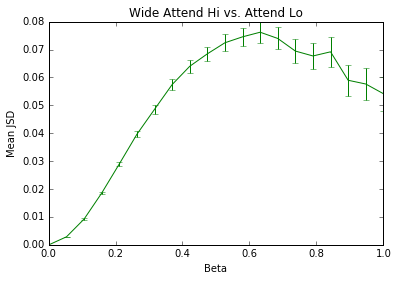

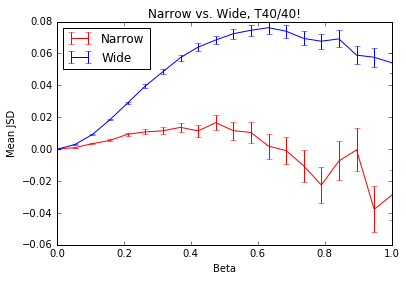

In [21]:
with open(os.path.join(blockPath, 'B604_1SLSE_ActivevsPassive_T40x40!.pkl'), 'r') as out:
    AllSave=pickle.load(out)
    
with open(os.path.join(blockPath, 'B604_1SLSE_ActivevsPassive_T40x40!_shuffle.pkl'), 'r') as out:
    AllSaveShuff=pickle.load(out)

cw = np.array(AllSave['Targ-wide.scg'])
cws = np.array(AllSaveShuff['Targ-wide-shuffle.scg'])


cw_mean = np.mean(cw, axis=1)
cws_mean = np.mean(cws, axis=1)


cw_sem = np.std(cw, axis=1) / np.sqrt(np.shape(cw)[1])
cws_sem = np.std(cws, axis=1) / np.sqrt(np.shape(cws)[1])



#plt.figure()
#plt.errorbar(betas, cw_mean, fmt='g', yerr=cw_sem)
#plt.errorbar(betas, xw_mean, fmt='k', yerr=xw_sem)
#plt.errorbar(betas, cws_mean, fmt='g--', yerr=cws_sem)
#plt.errorbar(betas, xws_mean, fmt='k--', yerr=xws_sem)
#plt.title('Wide Attend Hi vs. Attend Lo')
#plt.xlabel('Beta')
#plt.ylabel('Mean JSD')

plt.figure()
plt.errorbar(betas, cw_mean - cws_mean, fmt='g', yerr=np.sqrt(cw_sem**2 + cws_sem**2))

plt.title('Wide Attend Hi vs. Attend Lo')
plt.xlabel('Beta')
plt.ylabel('Mean JSD')
plt.savefig('/home/brad/emily/figures/B604_P01S15_wide_T40vs40!.png')

#Narrow

cn = np.array(AllSave['Targ-narrow.scg'])
cns = np.array(AllSaveShuff['Targ-narrow-shuffle.scg'])


cn_mean = np.mean(cn, axis=1)
cns_mean = np.mean(cns, axis=1)

cn_sem = np.std(cn, axis=1) / np.sqrt(np.shape(cn)[1])
cns_sem = np.std(cns, axis=1) / np.sqrt(np.shape(cns)[1])


plt.figure()
plt.errorbar(betas, cn_mean-cns_mean, fmt='r', yerr=np.sqrt(cn_sem**2 + cns_sem**2), label='Narrow')
plt.errorbar(betas, cw_mean - cws_mean, fmt='b', yerr=np.sqrt(cw_sem**2 + cws_sem**2), label='Wide')
plt.title('Narrow vs. Wide, T40/40!')
plt.xlabel('Beta')
plt.ylabel('Mean JSD')
plt.legend(loc='best')
plt.savefig('/home/brad/emily/figures/B604_P01S15_narrow_wide_T40vs40!.png')

In [23]:
AllSave = {}

stim_Targs = ['T3S3D40', 'T3S8D40']
stim_Full = 'T-1S-1D3'
for tc, sdc in zip(fnames['Targ'], fnames['Full']):
    sdfile = glob.glob(os.path.join(blockPath, 'scg/*-'+sdc))[0]
    tfile = glob.glob(os.path.join(blockPath, 'scg/*-'+tc))[0]
    print((sdfile, tfile))
    with open(sdfile, 'r') as scgf:
        scgFull = pickle.load(scgf)
    
    with open(tfile, 'r') as scgf:
        scgTarg = pickle.load(scgf)
    AllSCGTarg = []
    for stim in stim_Targs:
        AllSCGTarg = AllSCGTarg + scgTarg[stim]
        
    AllSCGFull = scgFull[stim_Full]
    betas = np.linspace(0.001, 1,20)
    msdActSave = []
    for beta in tqdm.tqdm(betas):
        divsave = JS_vs_beta_pairwise_attn(beta,AllSCGFull, AllSCGTarg, 1)
        msdActSave.append(divsave)
    AllSave[tc] = msdActSave
    
import pickle
with open(os.path.join(blockPath,'B604_1SLSE_ActivevsPassive_T3x3!.pkl'), 'wb') as out:
    pickle.dump(AllSave, out)

    

AllSaveShuff={}
for tc, sdc in zip(fnameshuff['Targ'], fnameshuff['Full']):
    sdfile = glob.glob(os.path.join(blockPath, 'scg/*-'+sdc))[0]
    tfile = glob.glob(os.path.join(blockPath, 'scg/*-'+tc))[0]
    print((sdfile, tfile))
    with open(sdfile, 'r') as scgf:
        scgFull = pickle.load(scgf)
    
    with open(tfile, 'r') as scgf:
        scgTarg = pickle.load(scgf)
    AllSCGTarg = []
    for stim in stim_Targs:
        AllSCGTarg = AllSCGTarg + scgTarg[stim]
        
    AllSCGFull = scgFull[stim_Full]
    betas = np.linspace(0.001, 1,20)
    msdActSave = []
    for beta in tqdm.tqdm(betas):
        divsave = JS_vs_beta_pairwise_attn(beta,AllSCGFull, AllSCGTarg, 1)
        msdActSave.append(divsave)
    AllSaveShuff[tc] = msdActSave
    
import pickle
with open(os.path.join(blockPath,'B604_1SLSE_ActivevsPassive_T3x3!_shuffle.pkl'), 'wb') as out:
    pickle.dump(AllSaveShuff, out)
    

('/home/brad/emily/P01S15/scg/20170517T171629Z-10.0-5.0-13.0-Full-wide.scg', '/home/brad/emily/P01S15/scg/20170517T165848Z-10.0-5.0-13.0-Targ-wide.scg')


100%|██████████| 20/20 [28:48<00:00, 84.95s/it]


('/home/brad/emily/P01S15/scg/20170517T171629Z-10.0-5.0-13.0-Full-narrow.scg', '/home/brad/emily/P01S15/scg/20170517T165848Z-10.0-5.0-13.0-Targ-narrow.scg')


100%|██████████| 20/20 [01:16<00:00,  4.51s/it]


('/home/brad/emily/P01S15/scg/20170517T171629Z-10.0-5.0-13.0-Full-wide-shuffle.scg', '/home/brad/emily/P01S15/scg/20170517T165848Z-10.0-5.0-13.0-Targ-wide-shuffle.scg')


100%|██████████| 20/20 [24:23<00:00, 74.88s/it]


('/home/brad/emily/P01S15/scg/20170517T171748Z-10.0-5.0-13.0-Full-narrow-shuffle.scg', '/home/brad/emily/P01S15/scg/20170517T165848Z-10.0-5.0-13.0-Targ-narrow-shuffle.scg')


100%|██████████| 20/20 [01:02<00:00,  3.21s/it]


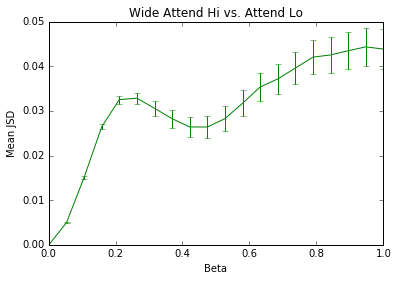

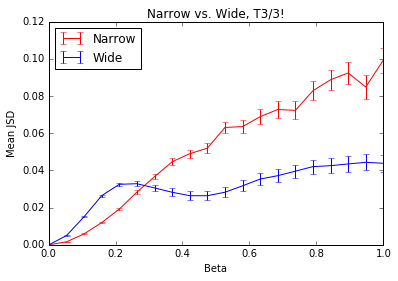

In [24]:
with open(os.path.join(blockPath, 'B604_1SLSE_ActivevsPassive_T3x3!.pkl'), 'r') as out:
    AllSave=pickle.load(out)
    
with open(os.path.join(blockPath, 'B604_1SLSE_ActivevsPassive_T3x3!_shuffle.pkl'), 'r') as out:
    AllSaveShuff=pickle.load(out)

cw = np.array(AllSave['Targ-wide.scg'])
cws = np.array(AllSaveShuff['Targ-wide-shuffle.scg'])


cw_mean = np.mean(cw, axis=1)
cws_mean = np.mean(cws, axis=1)


cw_sem = np.std(cw, axis=1) / np.sqrt(np.shape(cw)[1])
cws_sem = np.std(cws, axis=1) / np.sqrt(np.shape(cws)[1])



#plt.figure()
#plt.errorbar(betas, cw_mean, fmt='g', yerr=cw_sem)
#plt.errorbar(betas, xw_mean, fmt='k', yerr=xw_sem)
#plt.errorbar(betas, cws_mean, fmt='g--', yerr=cws_sem)
#plt.errorbar(betas, xws_mean, fmt='k--', yerr=xws_sem)
#plt.title('Wide Attend Hi vs. Attend Lo')
#plt.xlabel('Beta')
#plt.ylabel('Mean JSD')

plt.figure()
plt.errorbar(betas, cw_mean - cws_mean, fmt='g', yerr=np.sqrt(cw_sem**2 + cws_sem**2))

plt.title('Wide Attend Hi vs. Attend Lo')
plt.xlabel('Beta')
plt.ylabel('Mean JSD')
plt.savefig('/home/brad/emily/figures/B604_P01S15_wide_T3vs3!.png')

#Narrow

cn = np.array(AllSave['Targ-narrow.scg'])
cns = np.array(AllSaveShuff['Targ-narrow-shuffle.scg'])


cn_mean = np.mean(cn, axis=1)
cns_mean = np.mean(cns, axis=1)

cn_sem = np.std(cn, axis=1) / np.sqrt(np.shape(cn)[1])
cns_sem = np.std(cns, axis=1) / np.sqrt(np.shape(cns)[1])


plt.figure()
plt.errorbar(betas, cn_mean-cns_mean, fmt='r', yerr=np.sqrt(cn_sem**2 + cns_sem**2), label='Narrow')
plt.errorbar(betas, cw_mean - cws_mean, fmt='b', yerr=np.sqrt(cw_sem**2 + cws_sem**2), label='Wide')
plt.title('Narrow vs. Wide, T3/3!')
plt.xlabel('Beta')
plt.ylabel('Mean JSD')
plt.legend(loc='best')
plt.savefig('/home/brad/emily/figures/B604_P01S15_narrow_wide_T3vs3!.png')